<a href="https://colab.research.google.com/github/LearnByDoing2024/Model_Tests/blob/main/20241018/DepthPro_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# runtime settingand gpu

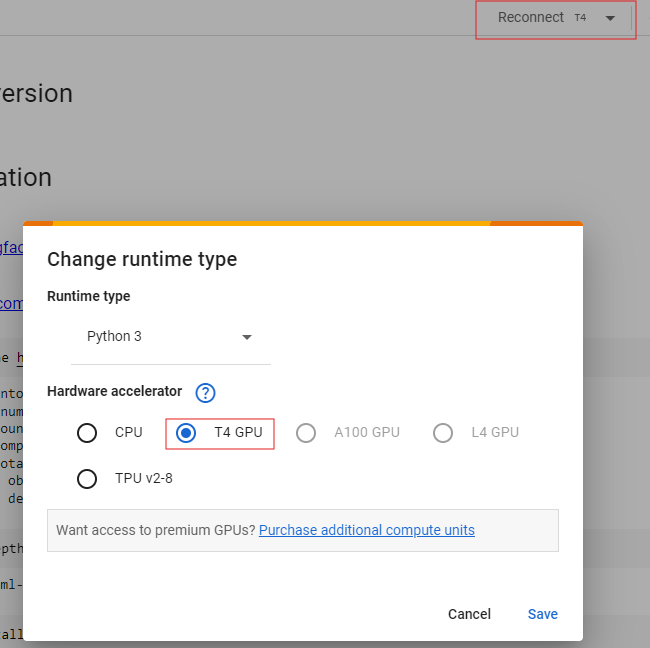

#preparation

https://huggingface.co/apple/DepthPro

https://github.com/apple/ml-depth-pro

In [1]:
!git clone https://github.com/apple/ml-depth-pro.git

Cloning into 'ml-depth-pro'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 45 (delta 5), reused 1 (delta 1), pack-reused 30 (from 1)
Receiving objects: 100% (45/45), 2.50 MiB | 35.09 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
%cd ml-depth-pro

/content/ml-depth-pro


In [3]:
!pip install -e .

Obtaining file:///content/ml-depth-pro
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.4 MB/s eta 0:00:00
  Building editable for depth_pro (pyproject.toml) ... done
  Created wheel for depth_pro: filename=depth_pro-0.1-0.editable-py3-none-any.whl size=4773 sha256=a09ad1df80ca856a0136aa4fb3b513b395a89a0de8c958c5ad2a59fed8db0247
  Stored in directory: /tmp/pip-ephem-wheel-cache-iewrnd8u/wheels/4a/c8/e8/cc1a32e9955f99baa359695f0111c5d82c97e9c7c826c0fd7a
Successfully built depth_pro


In [4]:
!bash get_pretrained_models.sh

--2024-10-18 12:14:12--  https://ml-site.cdn-apple.com/models/depth-pro/depth_pro.pt
Resolving ml-site.cdn-apple.com (ml-site.cdn-apple.com)... 17.253.31.140, 17.253.31.135, 2620:149:a06:f000::133, ...
Connecting to ml-site.cdn-apple.com (ml-site.cdn-apple.com)|17.253.31.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1904446787 (1.8G) [binary/octet-stream]
Saving to: ‘checkpoints/depth_pro.pt’

depth_pro.pt        100%[===================>]   1.77G   100MB/s    in 15s     

2024-10-18 12:14:28 (119 MB/s) - ‘checkpoints/depth_pro.pt’ saved [1904446787/1904446787]



In [5]:
!pip show depth_pro

Name: depth_pro
Version: 0.1
Summary: Inference/Network/Model code for Apple Depth Pro monocular depth estimation.
Home-page: https://github.com/apple/ml-depth-pro
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.10/dist-packages
Editable project location: /content/ml-depth-pro
Requires: matplotlib, numpy, pillow-heif, timm, torch, torchvision
Required-by: 


In [6]:
import sys
sys.path.append('/content/ml-depth-pro/src')

In [7]:
import torch

if torch.cuda.is_available():
    print("GPU is enabled and available.")
    print("GPU Type:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected.")

GPU is enabled and available.
GPU Type: Tesla T4


In [8]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [9]:
from PIL import Image
import depth_pro # This should import successfully now.

# Ensure that you use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()

# Move the model to GPU
model = model.to(device)
model.eval()  # Set the model to evaluation mode

/content/ml-depth-pro/src/depth_pro/depth_pro.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(config.checkpoint_uri, map_location="cpu")


DepthPro(
  (encoder): DepthProEncoder(
    (patch_encoder): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): LayerScale()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linea

In [10]:
!nvidia-smi

Fri Oct 18 12:15:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0              26W /  70W |   3761MiB / 15360MiB |     28%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#implementation

In [11]:
#@title code for implementation
from google.colab import files
import matplotlib.pyplot as plt
import torch
from PIL import Image

In [12]:
# Function to display original and predicted depth maps side by side
def display_images_side_by_side(original_img, depth_map, title):
    """Display original image and depth map side by side."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original Image
    axes[0].imshow(original_img)
    axes[0].set_title(f"Original: {title}")
    axes[0].axis("off")

    # Depth Map (normalize for visualization)
    depth_map_rescaled = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
    axes[1].imshow(depth_map_rescaled, cmap='plasma')
    axes[1].set_title(f"Predicted Depth: {title}")
    axes[1].axis("off")

    plt.show()

In [13]:
# Process and display each uploaded image
def process_and_display_images():
    while True:
        # Allow multiple uploads in batches
        uploaded = files.upload()

        # If no files are uploaded, break the loop
        if not uploaded:
            print("No files uploaded. Stopping the loop.")
            break

        # Process each uploaded image
        for image_name in uploaded.keys():
            print(f"Processing {image_name}...")

            # Load and preprocess the uploaded image
            image, _, f_px = depth_pro.load_rgb(image_name)
            original_image = Image.open(image_name)  # Load original image for display
            image = transform(image)

            # Move the image to the GPU
            image = image.to(device)

            # Run inference on the GPU
            with torch.no_grad():
                prediction = model.infer(image, f_px=f_px)

            # Retrieve the depth map
            depth = prediction["depth"].cpu()  # Move result back to CPU for visualization

            # Display original and depth map side by side
            display_images_side_by_side(original_image, depth, image_name)

Saving autumn-5092804_1280.jpg to autumn-5092804_1280.jpg
Processing autumn-5092804_1280.jpg...


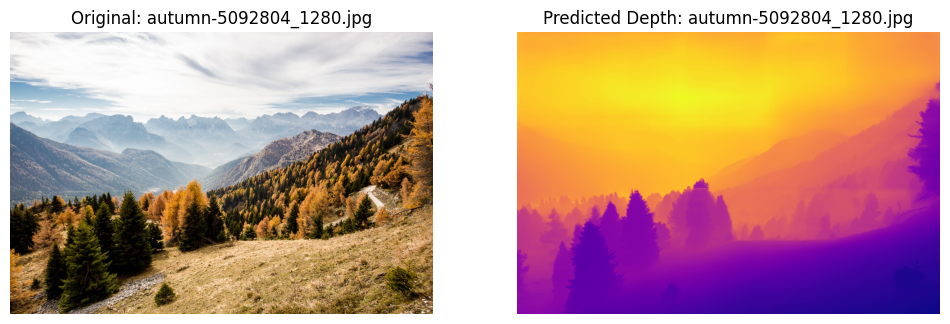

Saving trento-5231096_640.jpg to trento-5231096_640.jpg
Processing trento-5231096_640.jpg...


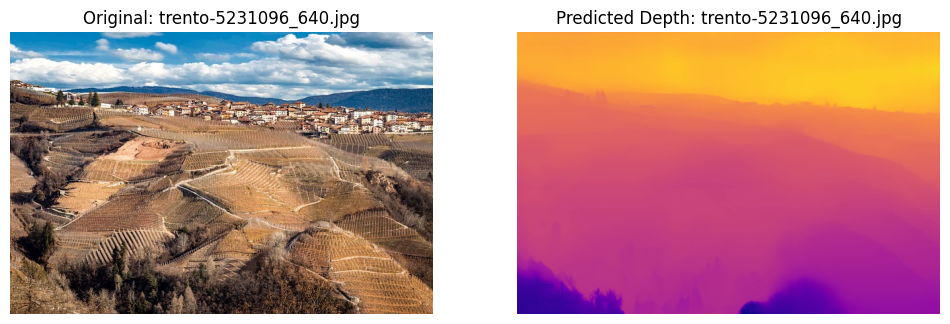

Saving mountains-7348840_640.jpg to mountains-7348840_640.jpg
Processing mountains-7348840_640.jpg...


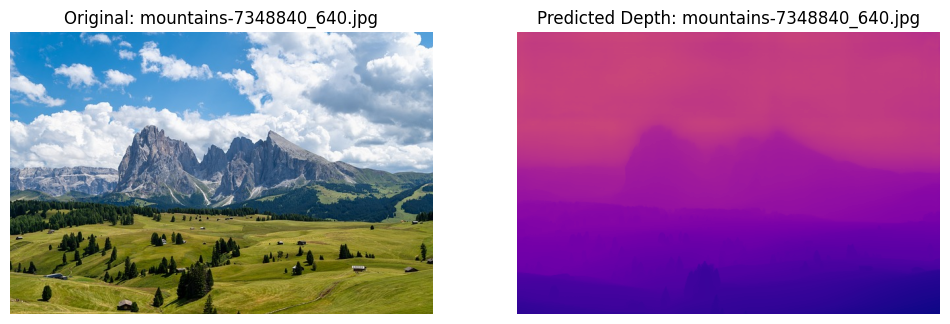

Saving dome-3738653_640.jpg to dome-3738653_640.jpg
Processing dome-3738653_640.jpg...


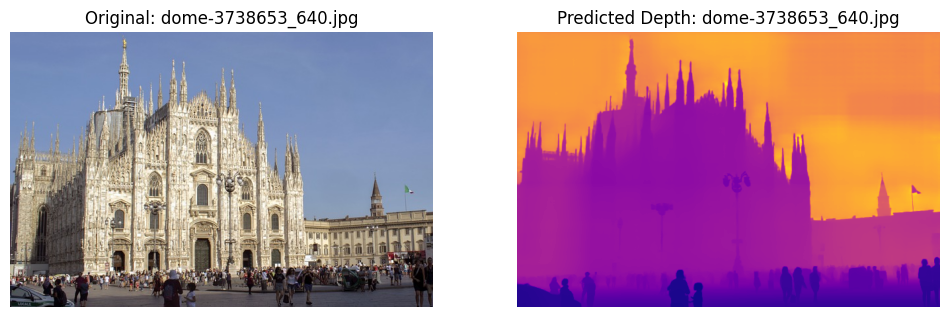

Saving architecture-5055472_640.jpg to architecture-5055472_640.jpg
Processing architecture-5055472_640.jpg...


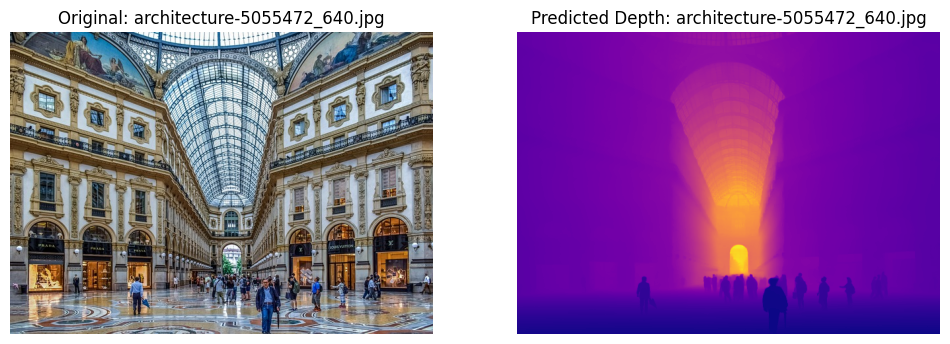

Saving stadium-596389_640.jpg to stadium-596389_640.jpg
Processing stadium-596389_640.jpg...


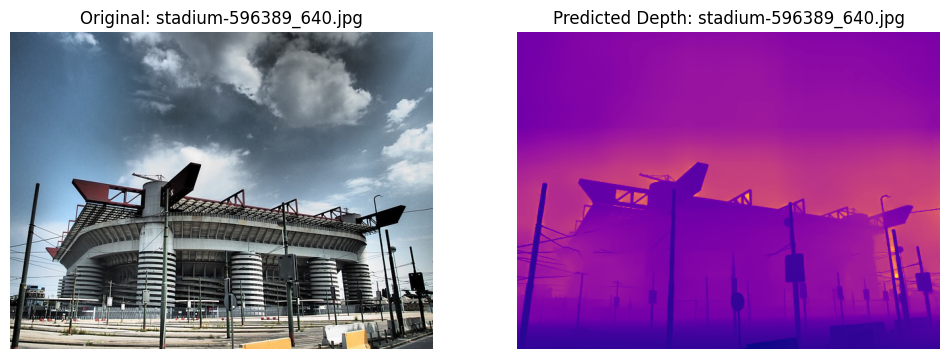

Saving san-siro-2430650_640.jpg to san-siro-2430650_640.jpg
Processing san-siro-2430650_640.jpg...


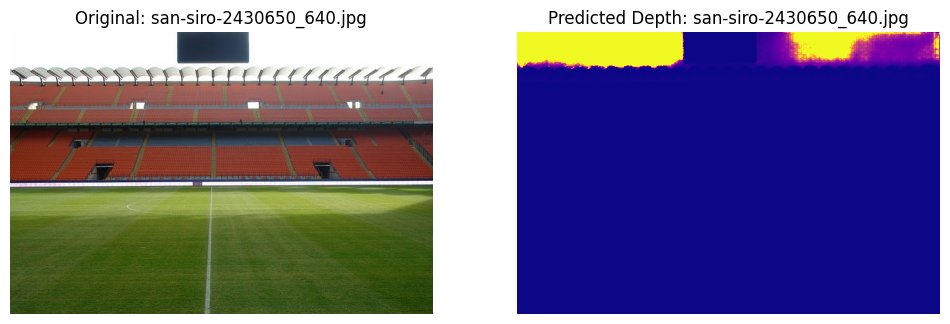

Saving milan-2204737_640.jpg to milan-2204737_640.jpg
Processing milan-2204737_640.jpg...


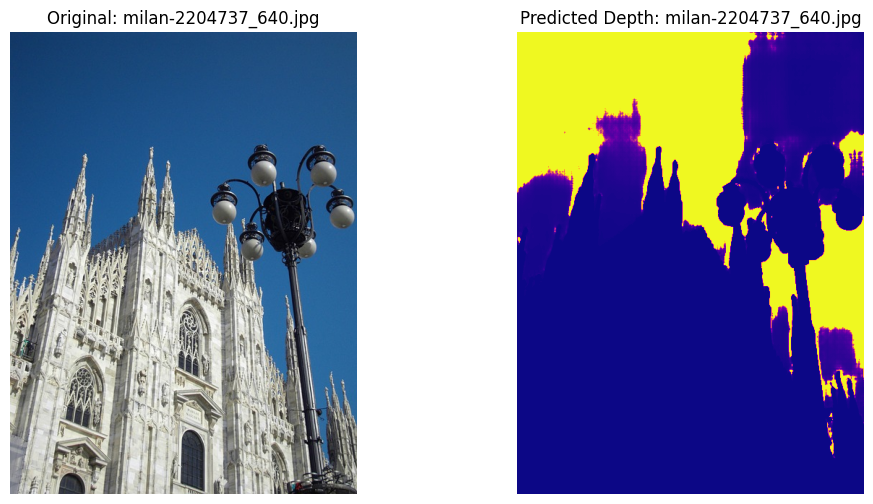

Saving taxi-1574278_640.jpg to taxi-1574278_640.jpg
Processing taxi-1574278_640.jpg...


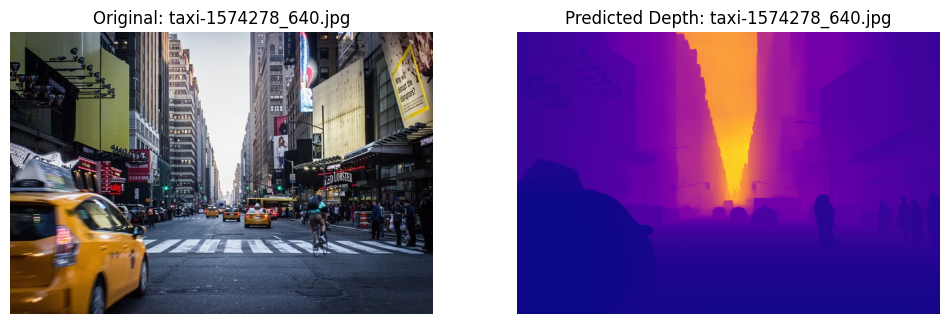

KeyboardInterrupt: 

In [14]:
# Run the function to upload, process, and display results
process_and_display_images()

In [15]:
!nvidia-smi

Fri Oct 18 12:23:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0              28W /  70W |  11809MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--